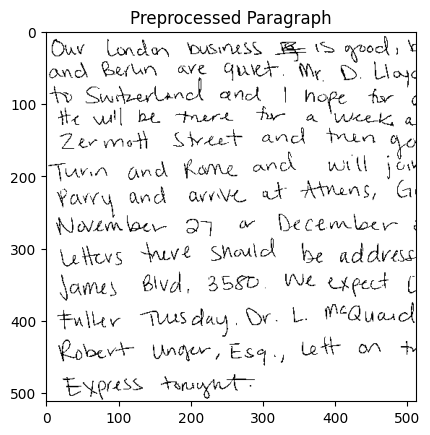

(512, 512)


In [36]:
from PIL import Image
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load the image
img_path = '/content/mnsit_paragraph3.jpeg'
img = Image.open(img_path)

# Convert to grayscale
img = img.convert('L')

# Resize to 512x512 pixels
img = img.resize((512, 512))

# Convert to numpy array
img_array = np.array(img)

# Apply Otsu's thresholding
_, binary_img = cv2.threshold(img_array, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Invert the colors
inverted_img = cv2.bitwise_not(binary_img)

# Display the processed image
plt.imshow(inverted_img, cmap='gray')
plt.title('Preprocessed Paragraph')
plt.show()

# Normalize the pixel values to [0, 1]
img_array = img_array / 255.0

# Save the array for further processing
img_array = img_array * 255

print(img_array.shape)


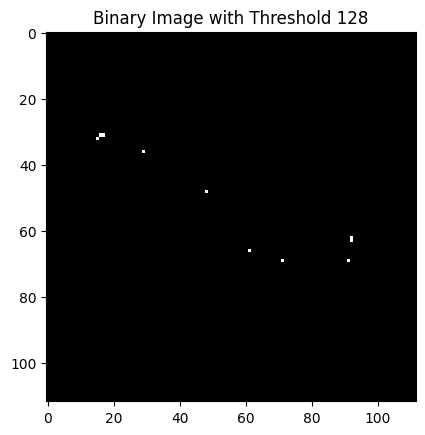

In [26]:
# Load the image in grayscale
img_path = '/content/mnsit_word3.jpeg'
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# Apply thresholding with a different threshold value
threshold_value = 128  # Try values between 0 to 255
_, binary_img = cv2.threshold(img, threshold_value, 255, cv2.THRESH_BINARY_INV)

# Ensure binary_img is a NumPy array
if isinstance(binary_img, np.ndarray):
    # Display the binary image
    plt.imshow(binary_img, cmap='gray')
    plt.title(f'Binary Image with Threshold {threshold_value}')
    plt.show()
else:
    print(f"Unexpected data type: {type(binary_img)}")

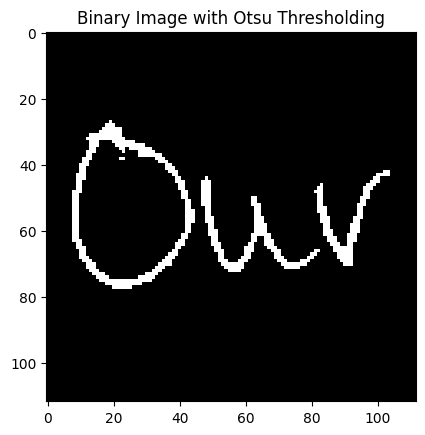

In [27]:
# Apply Otsu's thresholding
_, binary_img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Ensure binary_img is a NumPy array
if isinstance(binary_img, np.ndarray):
    # Display the binary image
    plt.imshow(binary_img, cmap='gray')
    plt.title('Binary Image with Otsu Thresholding')
    plt.show()
else:
    print(f"Unexpected data type: {type(binary_img)}")


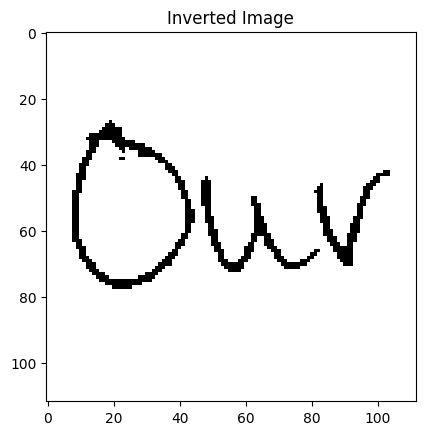

In [28]:
# Invert the colors using bitwise NOT
inverted_img = cv2.bitwise_not(binary_img)

# Display the inverted image
plt.imshow(inverted_img, cmap='gray')
plt.title('Inverted Image')
plt.show()

In [37]:
# Path to save the preprocessed image as JPEG
save_directory = r'C:\Users\16154\vu\Group Project\project 4\Handwriting_CNN\preprocessing'
file_name = 'preprocessedparagraph_3.jpeg'
output_path = os.path.join(save_directory, file_name)

# Ensure the directory exists
if not os.path.exists(save_directory):
    os.makedirs(save_directory)

# Save the inverted image as JPEG
cv2.imwrite(output_path, inverted_img)

print(f"Image successfully saved as {output_path}")

Image successfully saved as C:\Users\16154\vu\Group Project\project 4\Handwriting_CNN\preprocessing/preprocessedparagraph_3.jpeg


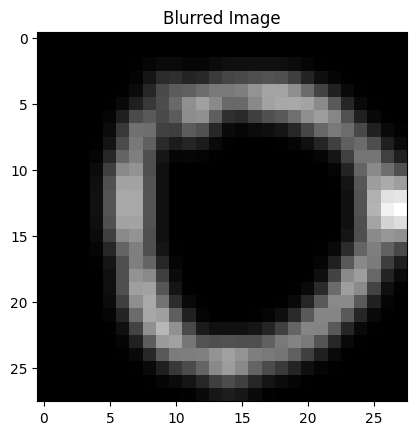

In [5]:
# Apply Gaussian Blur
blurred_img = cv2.GaussianBlur(binary_img, (5, 5), 0)

# Display the blurred image
plt.imshow(blurred_img, cmap='gray')
plt.title('Blurred Image')
plt.show()


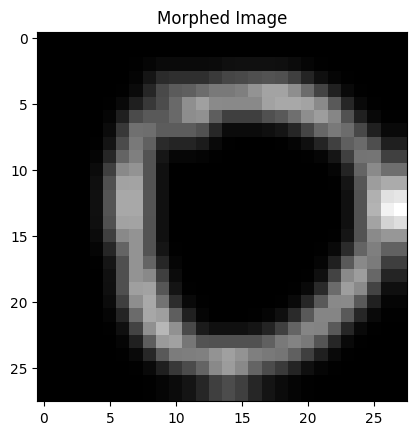

(28, 28)


In [6]:
# Apply dilation followed by erosion (closing)
kernel = np.ones((3, 3), np.uint8)
morphed_img = cv2.morphologyEx(blurred_img, cv2.MORPH_CLOSE, kernel)

# Display the morphed image
plt.imshow(morphed_img, cmap='gray')
plt.title('Morphed Image')
plt.show()

# Normalize the pixel values to [0, 1] again for model input
final_img_array = morphed_img / 255.0

print(final_img_array.shape)  # Should be (28, 28)
